# Strojové učení v hmotnostní spektrometrii
## Cesta tam a zase zpátky
### Aleš Křenek, Filip Jozefov, Adam Hájek

# Hra na MS

### Referenční data (2 týmy)
- "ionizace" -- rozložení zvířátka na 3-8 částí
  - částečně respektujte, jak se rozpadá samo, ale ne vždy stejně, občas užijte mírné násilí
- "měření spektra"
  - hmotnosti fragmentů určete podle následujícího klíče
  - u každé unikátní hmotnosti spočtěte počet výskytů (vznikne seznam dvojic [_hmotnost, počet_])
  - seznamy z jednotlivých "měření" sečtěte po složkách (vznikne seznam dvojic [_hmotnost, celkový počet_])
  
### Experimentální data (2 týmy)
- dtto, jen ionizaci jsem udělal za vás, abyste tak snadno nepoznali, co bylo na vstupu

### Příklady hmotností
| Fragment | hmotnost |
| :------ | ------: | 
| <img src="IMG_1358.jpeg" width="100"/> | 1333 |



### Referenční data

In [5]:
import numpy as np
zelva_ = np.array([ [1.0, 5], [2.67, 3], [4.0, 3], [4.67, 1], [5.67, 1], [6, 3] ])
pes_ = np.array([ [ 1.0, 1 ], [2.0, 4], [2.67, 4], [3.0, 1], [6.67, 4] ])

In [52]:
import matchms as ms
zelva = ms.Spectrum(mz=zelva_[:,0]*10.,intensities=zelva_[:,1],metadata={ 'Compound Name':'želva','precursor_mz':'100'})
pes = ms.Spectrum(mz=pes_[:,0]*10.,intensities=pes_[:,1],metadata={'Compound Name':'pes', 'precursor_mz':'100'})

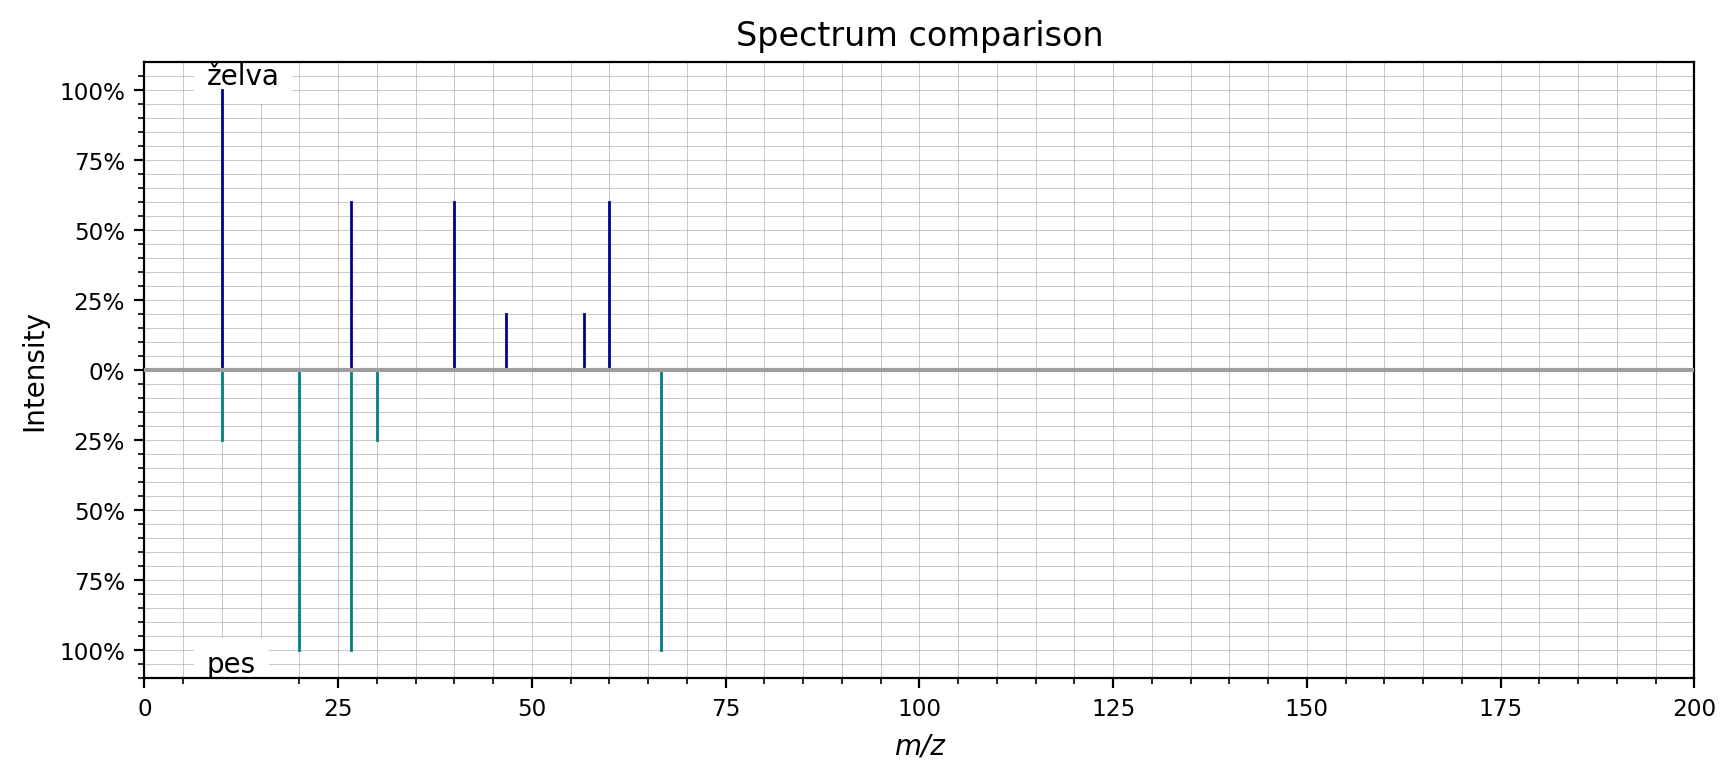

In [53]:
import matplotlib.pyplot as plt
zelva.plot_against(pes,figsize=(10,4))
plt.show()

### Experimentální data

In [81]:
pokus1_ = np.array([ [1.0, 4], [2.67, 3], [3, 1], [4.0, 3], [4.67, 1], [5.67, 1]])
pokus2_ = np.array([ [ 1.0, 1 ], [2.0, 3], [2.67, 4], [3.0, 1], [4.0, 2], [6.67, 4] ])
pokus1 = ms.Spectrum(mz=pokus1_[:,0]*10.,intensities=pokus1_[:,1],metadata={ 'Compound Name':'Pokus 1','precursor_mz':'100'})
pokus2 = ms.Spectrum(mz=pokus2_[:,0]*10.,intensities=pokus2_[:,1],metadata={'Compound Name':'Pokus 2','precursor_mz':'100'})

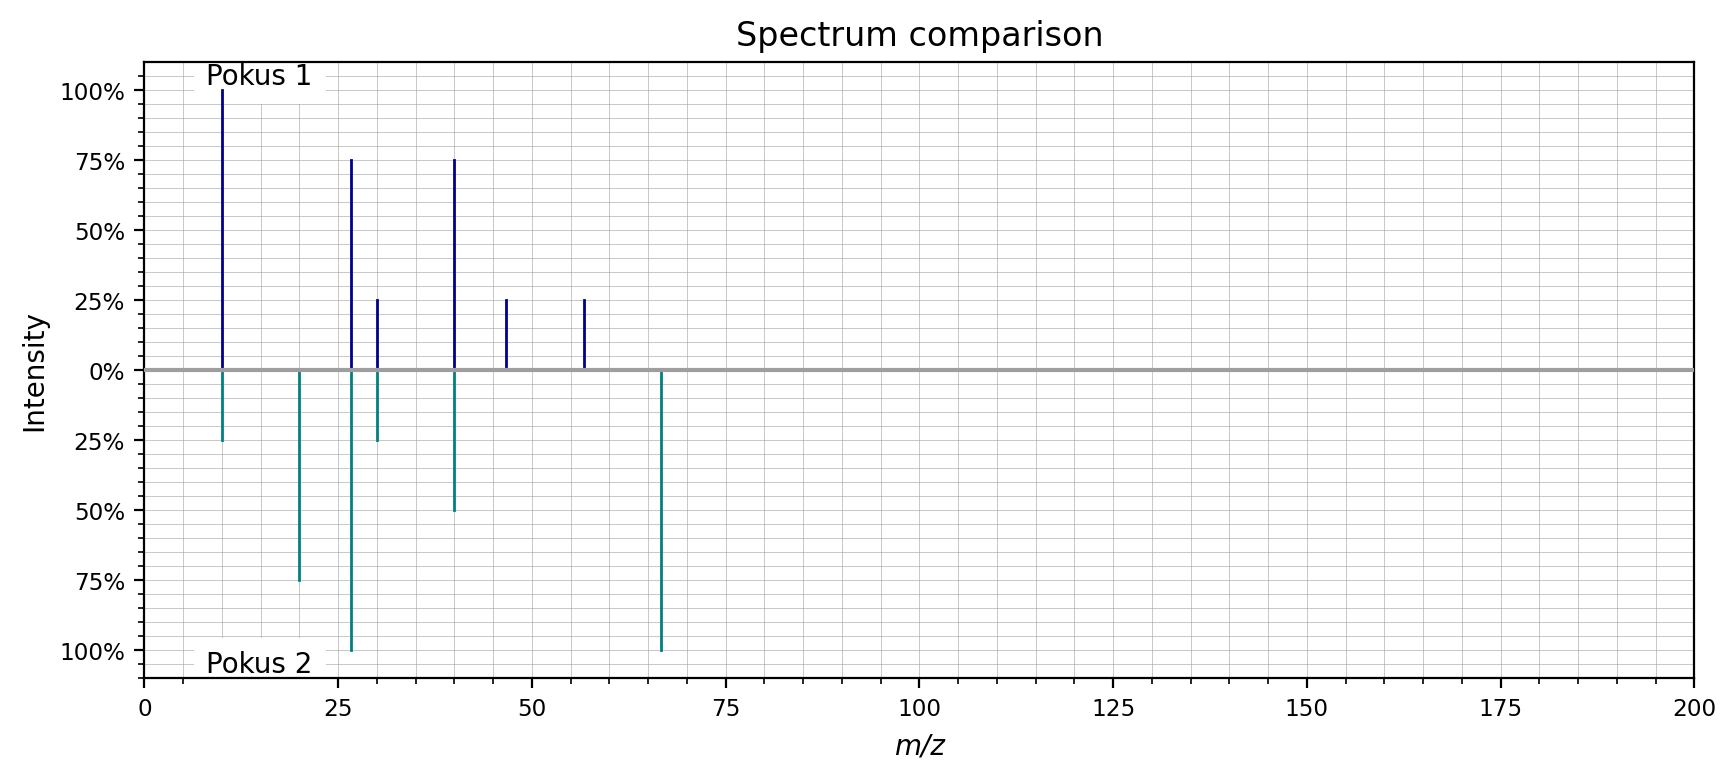

In [82]:
pokus1.plot_against(pokus2,figsize=(10,4))
plt.show()

### Kouknu a vidím

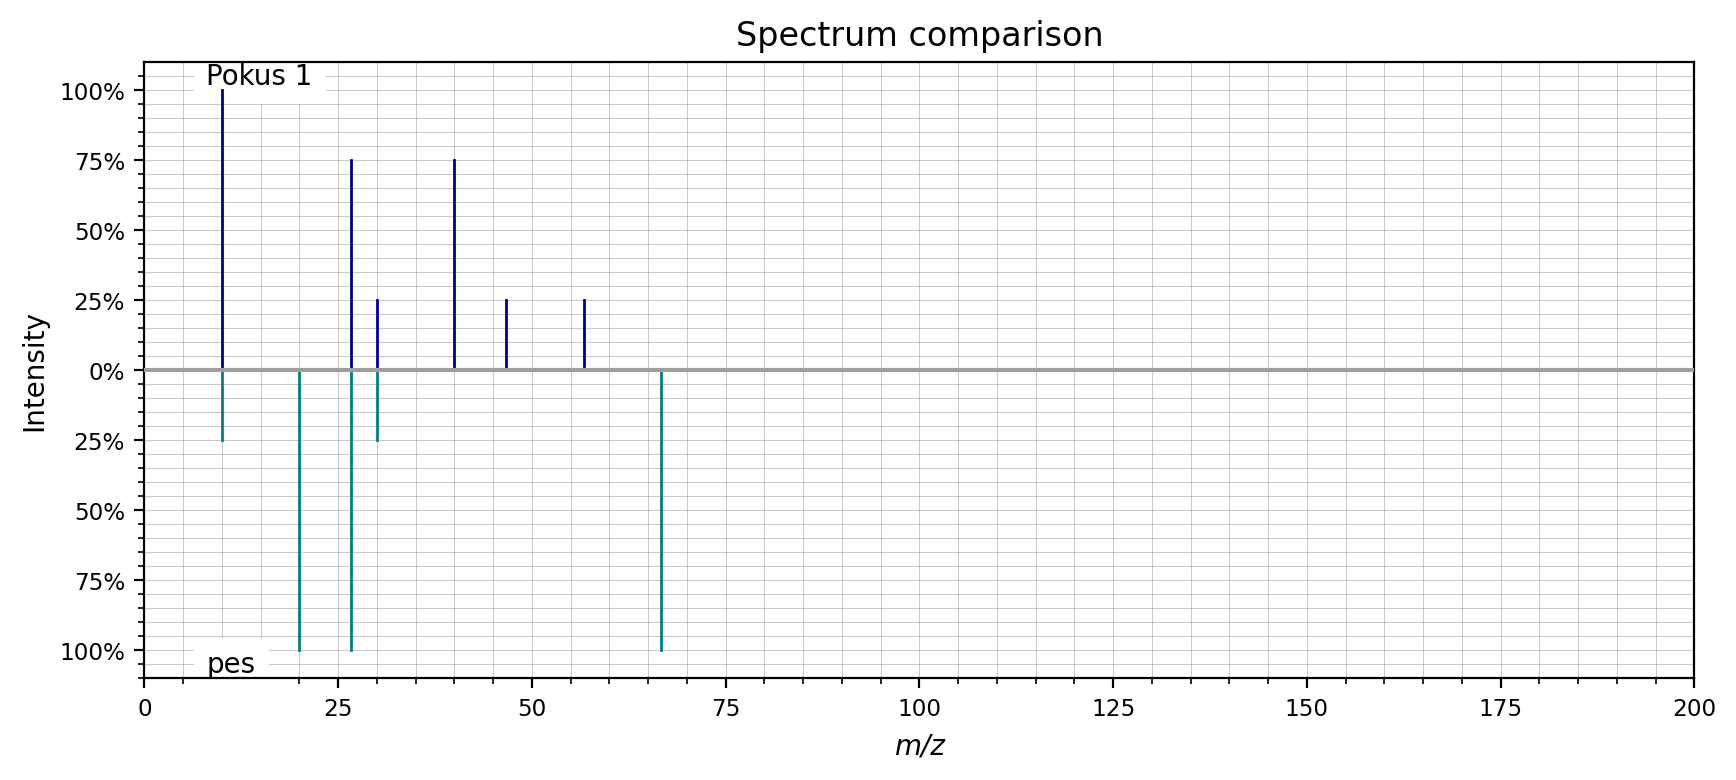

In [42]:
pokus1.plot_against(pes,figsize=(10,4))
plt.show()

### Zobecněný skalární součin

$$ \textit{DP}_{a,b}(S_p,S_r) = \frac{\sum_k m_k^aI_{pk}^b \; m_k^a I_{rk}^b}{\sum_k (m_k^a I_{pk}^b)^2 \sum_k (m_k^a I_{rk}^b)^2  }$$

- skalární součin intenzit na stejných hodnotách $m$ (rozsah indexu $k$)
- špičky bez protikusu ve druhém spektru se ignorují
- váženo hmotností $m$ a modifikováno exponenty $a,b$
- normalizace součiny sama se sebou

In [76]:
# regular dot product
dp = ms.similarity.ModifiedCosine(mz_power=1.,intensity_power=.5)

# Stein dot product
sdp = ms.similarity.ModifiedCosine(mz_power=3.,intensity_power=.6)

In [77]:
dp.matrix(references=[zelva,pes],queries=[pokus1,pokus2])

array([[(0.71202595, 5), (0.26650223, 3)],
       [(0.20049652, 3), (0.93601231, 5)]],
      dtype=[('score', '<f8'), ('matches', '<i8')])

In [78]:
sdp.matrix(references=[zelva,pes],queries=[pokus1,pokus2])

array([[(0.50378163, 5), (0.04069104, 3)],
       [(0.01385581, 3), (0.99007905, 5)]],
      dtype=[('score', '<f8'), ('matches', '<i8')])

# MS doopravdy

## Typická zadání
- Dostanu vzorek neznámého složení
- A) Obsahuje nějakou konkrétní sloučeninu (např. stopy výbušnin při letištní kontrole)?
- B) Jaké je jeho celkové složení?

## Fáze analýzy
- chromatografická separace 
- ionizace složek a měření hmotnostního spektra
- výpočetní zpracování získaných dat
- určení jednotlivých složek z izolovaných spekter

_Spousta zajímavé fyziky, matematiky a programování, zájemcům popovídáme u večeře_

# A kde je to strojové učení?

## Chemický prostor vs. spektrální databáze 

- 350 000 položek v databázi NIST EI-MS (známá spektra)

- téměř $10^9$ položek v databázi ZINC (když zaplatím, někdo mi to uvaří)

- odhadovaných $10^{60}$ možných tzv. malých molekul

## Dopředné modely (Filip)
- ze vzorce určit spektrum
- model je natrénovaný na experimentální databázi (NIST)
- např. množina (i rozsáhlá) "podezřelých" sloučenin, jejichž spektra neznám; srovnávám generovaná spektra s experimentem
- generování trénovací sady pro zpětné modely

## Zpětné modely (Adam)
- z naměřeného spektra chci přímo určit vzorec
- model je výrazně větší, je třeba trénovat na mnohem větší sadě než NIST
- plnohodnotná necílená analýza

# Cesta tam a zase zpátky

<table>
    <tr>
        <td><img src='thc-formula.png' width='500'/></td>
        <td>$\leftrightarrow$</td>
        <td><img src='thc-spec.png' width='500'/></td>
    </tr>
</table>
 